In [3]:
import numpy as np
import sep
from astropy.io import fits
from astropy.table import Table

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [5]:
# read image into standard 2-d numpy array
data = fits.getdata("image.fits")

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
[W 2024-12-03 10:13:28,646.646 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992               
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]
[W 2024-12-03 10:13:28,649.649 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC      
[W 2024-12-03 10:13:28,652.652 astropy] The following header keyword is invalid or follows an unrecognized non-standard convention:
ESO-LOG 03:04:09> EXPO EMM

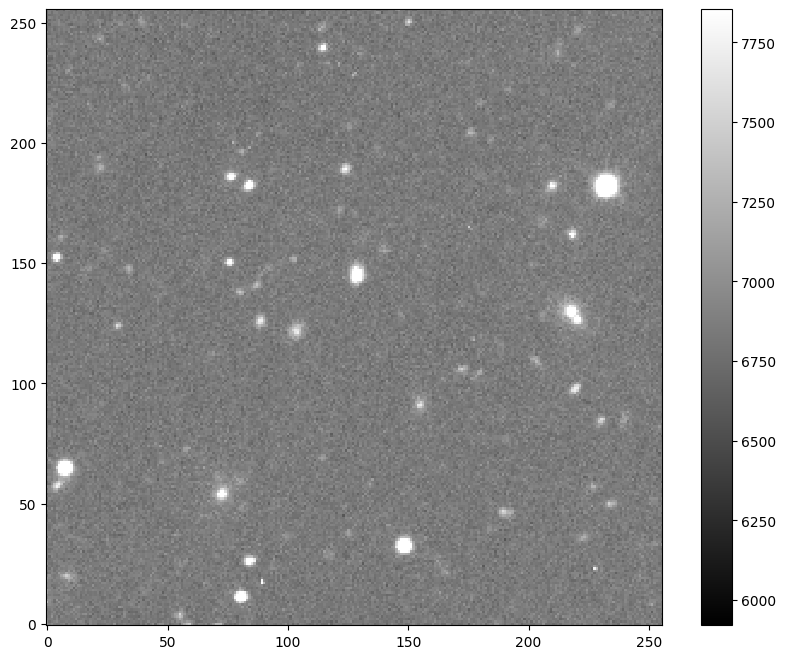

In [6]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("finalproject0_1.png")

In [7]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [8]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


In [9]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

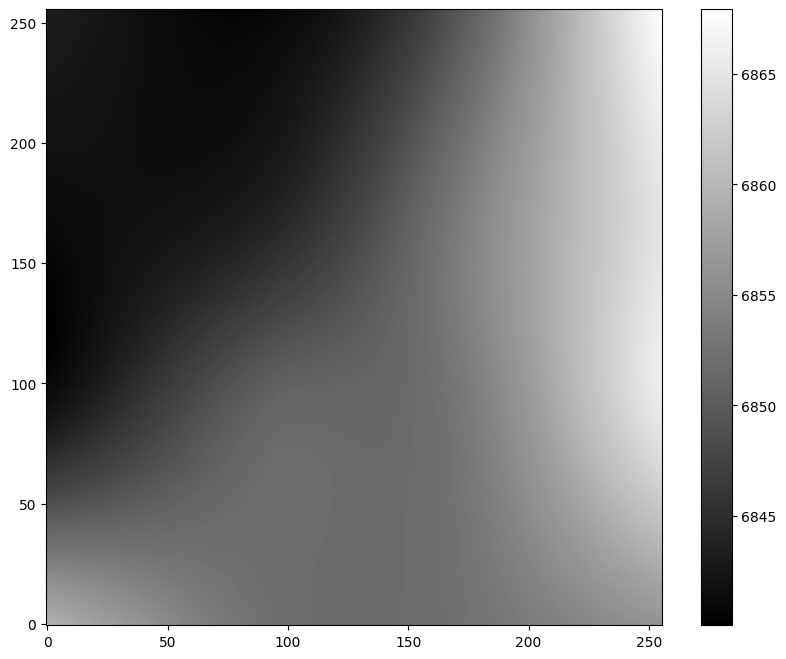

In [10]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("finalproject0_2.png")

In [11]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

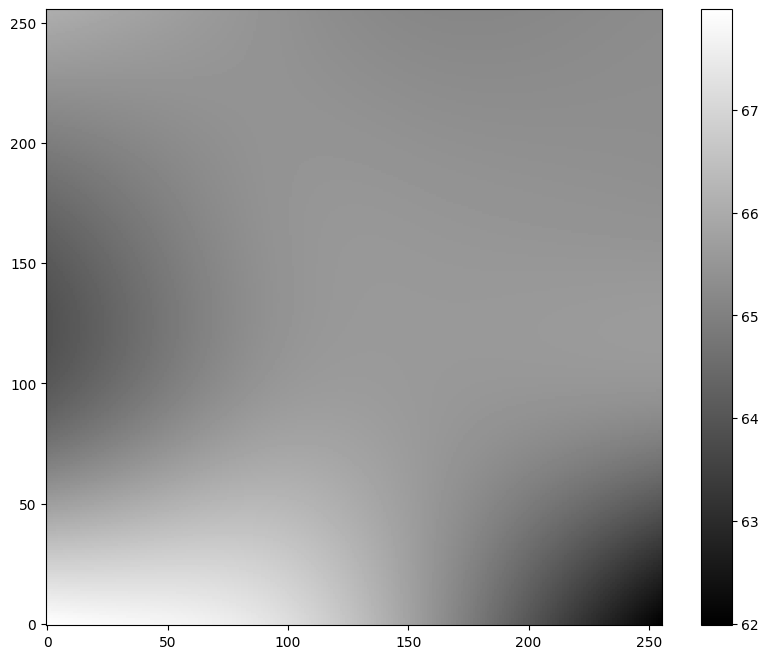

In [12]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("finalproject0_3.png")

In [13]:
data_sub = data - bkg

In [14]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [15]:
# how many objects were detected
len(objects)

69

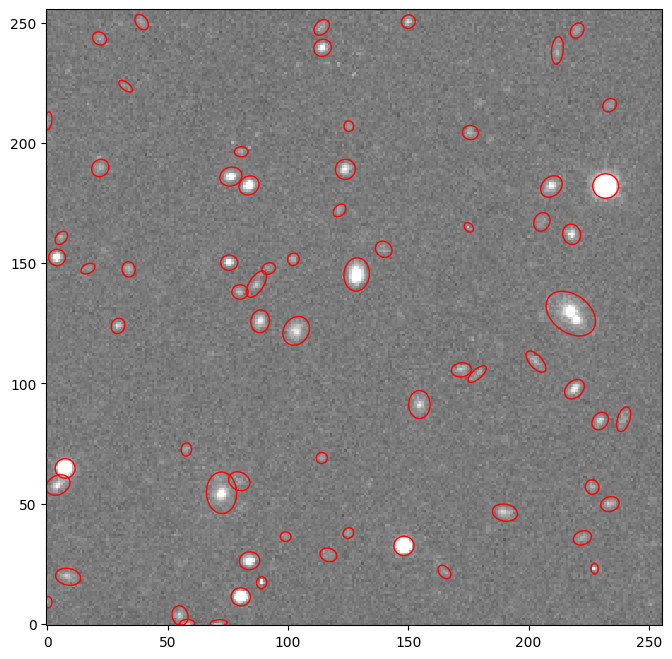

In [16]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("finalproject0_4.png")

In [17]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [18]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


#### Running it on the new image

In [19]:
import numpy as np
import sep
from astropy.io import fits
from astropy.table import Table

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [21]:
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = data.byteswap().newbyteorder()

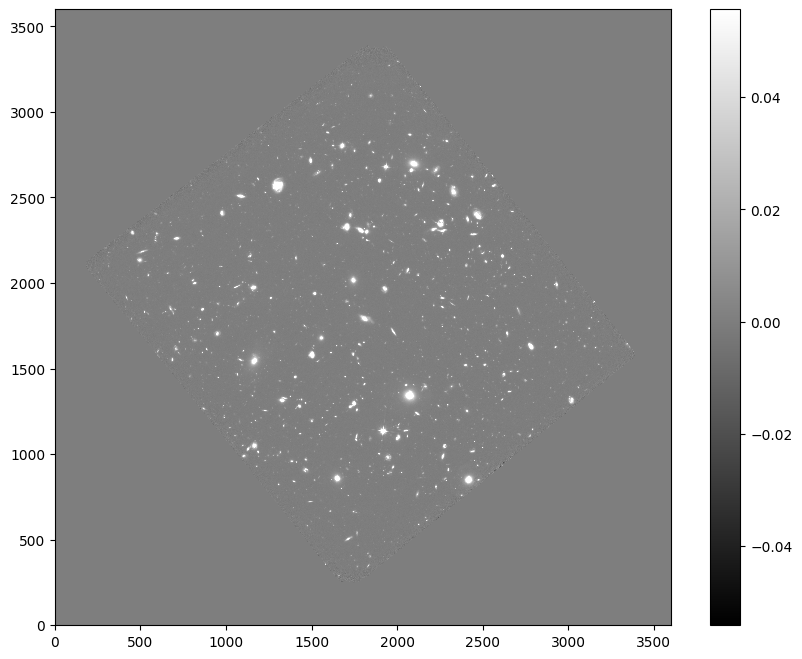

In [22]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig("finalproject1_1.png")

In [23]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [24]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [25]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

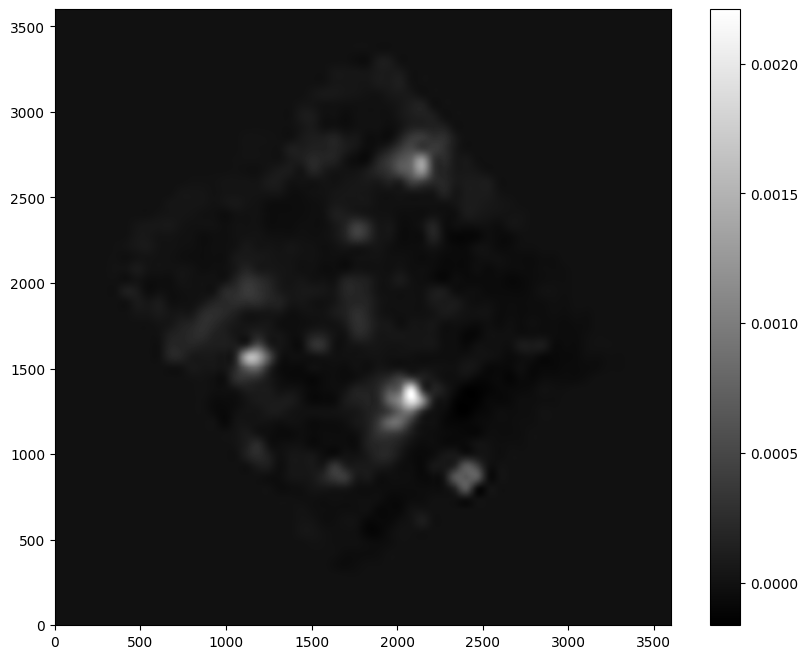

In [176]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("finalproject1_2.png")

In [177]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

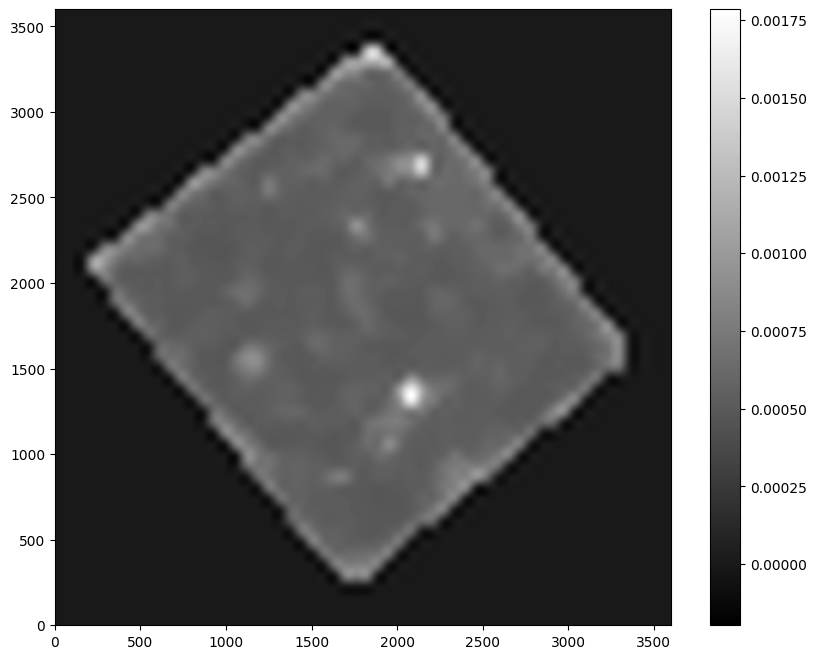

In [178]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("finalproject1_3.png")

In [179]:
data_sub = data - bkg

In [180]:
objects = sep.extract(data_sub, 20, err=bkg.globalrms)

In [181]:
# how many objects were detected
len(objects)

939

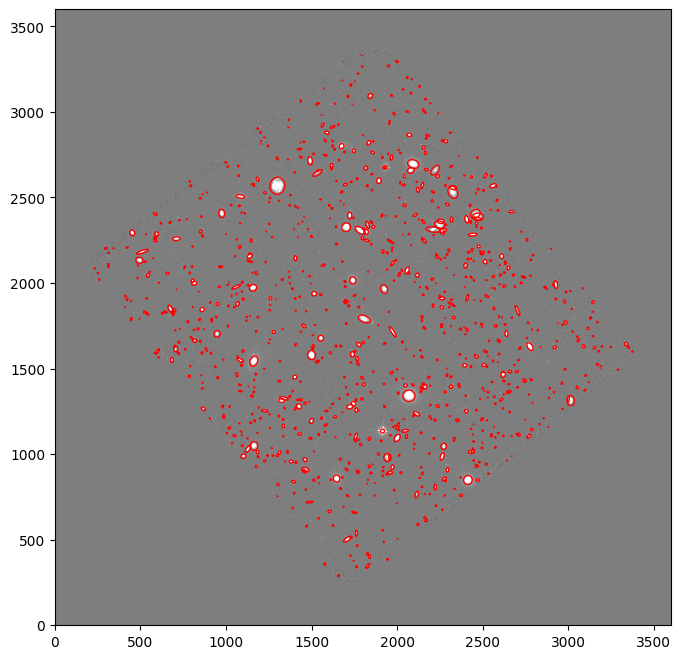

In [182]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("finalproject1_4.png")

In [183]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [184]:
print(f'There are {len(objects)} Objects!')
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

There are 939 Objects!
object 0: flux = 1.148925 +/- 1.071883
object 1: flux = 0.551862 +/- 0.742880
object 2: flux = 1.119971 +/- 1.058291
object 3: flux = 0.885204 +/- 0.940857
object 4: flux = 0.288213 +/- 0.536863
object 5: flux = 0.688374 +/- 0.829688
object 6: flux = 0.498388 +/- 0.705972
object 7: flux = 0.755299 +/- 0.869084
object 8: flux = 1.255633 +/- 1.120554
object 9: flux = 0.971109 +/- 0.985453


In [185]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

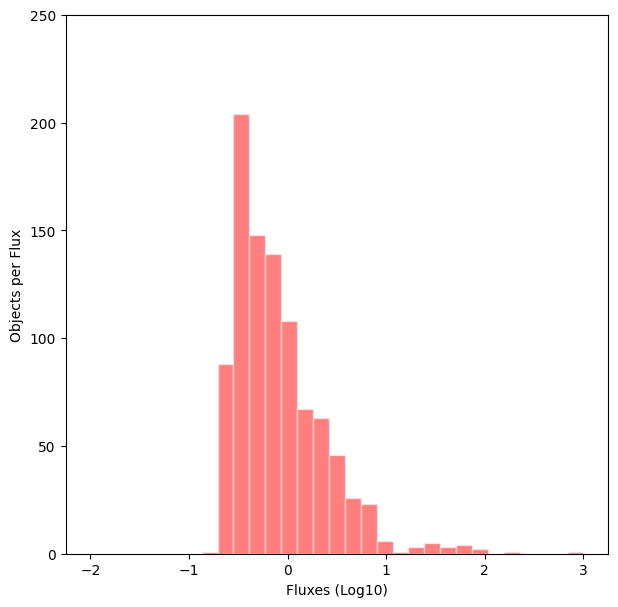

In [216]:
#The majority of the points lay within 15 units

##flux = -2.5*np.log10(flux)

fluxhistogram = flux
fluxhistogram = np.log10(fluxhistogram)

fig = plt.figure(figsize=(7,7))
n_bins = 31
x_min = -2
x_max = 3

y_hist, x_hist, _ = plt.hist(fluxhistogram, bins = n_bins, range=[x_min,x_max], alpha=0.5, edgecolor='white', density=False, color='red')
plt.ylim(0, 250)
plt.xlabel("Fluxes (Log10)")
plt.ylabel("Objects per Flux")
plt.savefig("finalprojecthistogram_zoomed.png")



In [196]:
#Mean:
fluxmean = np.mean(flux)
#Median:
fluxmedian = np.median(flux)
print(f'A mean of {fluxmean} when our median is {fluxmedian} could mean our dataset is skewed.')

#Standard Deviation:
fluxstd = np.std(flux)
print(f'Because our Standard Deviation turned out to be {fluxstd}, we can tell our dataset is incredibly skewed.')

#To determine hw many Standard Deviations something is from the Mean, we can use z-score: z = (x - μ) / σ
#x = data point
#μ = mean of dataset
#σ = std of dataset

#The furthest outlier will have the largest z-score,
#We can isolate these outliers by only printing if the z-score is greater than 1.

nooutliers = []
outliers = []

for i in range(939):
    zscore = (flux[i] - fluxmean) / fluxstd
    if zscore >= 0.4:
        outliers.append(i)
        print("Object {:d}: Z-Score = {:f}, Flux = {:f}".format(i, zscore, flux[i]))
        if zscore >= 10:
            brightestpoint = i
    else:
        nooutliers.append(flux[i])
        
        

#By setting up the blank testarray, we can append all Fluxes with a zscore below 0.4 to a new array, allowing us to take a new Mean/STD without outliers.
        
fluxstdtest = np.std(nooutliers)
fluxmeantest = np.mean(nooutliers)
print(f'After removing our Outliers, our new STD is {fluxstdtest}, and our new Mean is {fluxmeantest}.')
#We can see from this that our biggest FLux, Object 176 (Flux 806) is 28 Standard Deviations away from the mean
#and is what is impacting our Standard Deviation so much.
print(f'Comparing these to our Median, {fluxmedian}, we can see we are closer that we were before.')

A mean of 3.027042236089139 when our median is 0.6342044152691961 could mean our dataset is skewed.
Because our Standard Deviation turned out to be 27.865219113239107, we can tell our dataset is incredibly skewed.
Object 63: Z-Score = 2.256558, Flux = 65.906521
Object 64: Z-Score = 2.480004, Flux = 72.132892
Object 176: Z-Score = 28.823042, Flux = 806.187410
Object 241: Z-Score = 1.762040, Flux = 52.126679
Object 252: Z-Score = 1.533248, Flux = 45.751343
Object 275: Z-Score = 2.686864, Flux = 77.897083
Object 369: Z-Score = 1.858672, Flux = 54.819349
Object 408: Z-Score = 0.767914, Flux = 24.425138
Object 491: Z-Score = 0.671129, Flux = 21.728193
Object 604: Z-Score = 1.186547, Flux = 36.090446
Object 730: Z-Score = 0.863248, Flux = 27.081625
Object 740: Z-Score = 0.530932, Flux = 17.821589
Object 801: Z-Score = 1.138560, Flux = 34.753275
Object 834: Z-Score = 0.971517, Flux = 30.098586
Object 853: Z-Score = 0.844971, Flux = 26.572342
Object 854: Z-Score = 7.576269, Flux = 214.141442
O

#### Now, we need to determine where our major point, Object 176, will lie on the graph

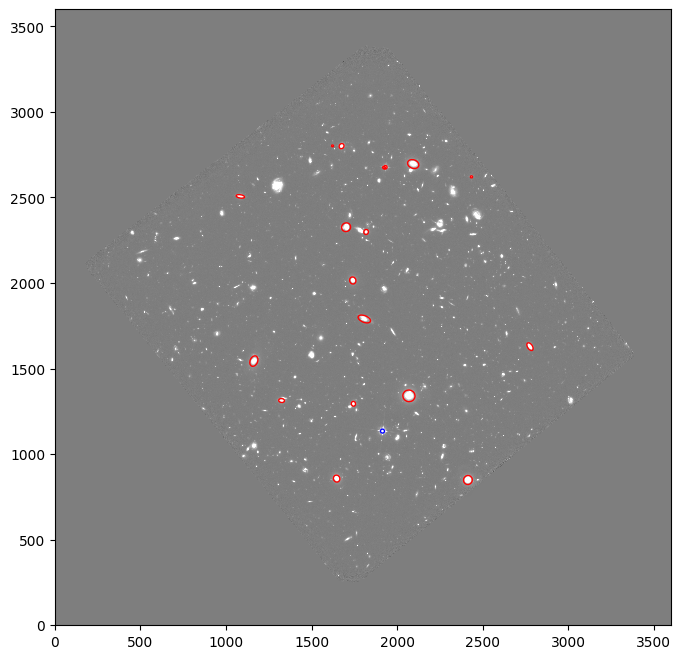

In [191]:
from matplotlib.patches import Ellipse

#Replot Background subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')




# plot an ellipse for each OUTLIER. 
def outlierfinder(i):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    return

def brightestobject(i):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('blue')
    ax.add_artist(e)
    return

for i in range(len(outliers)):
    x = outliers[i]
    if x == brightestpoint:
        brightestobject(x)
    else:
        outlierfinder(x)

plt.savefig("finalproject1_5.png")
#I'm not too sure how to add the object numbers to the Ellipse, when I tried to Legend "e", it says you cannot iterate over ellipses.
#Anyway, Blue is our Object 176, and Red objects are other Points of Interest.

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [323]:
#Define file names
fdata_F105W = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_F125W = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_F160W = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

#Read in data
#All HDU values provided some kind of color-skewing besides this one, which is just kinda white.

hdu_2 = fits.getdata(fdata_F105W)
hdu_3 = fits.getdata(fdata_F125W)
hdu_4 = fits.getdata(fdata_F160W)

In [316]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2.
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.)
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

In [317]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax = rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin,vmax=vpmax)

In [318]:
data_2_res, d2min, d2max = rescale_image(hdu_2)
data_3_res, d3min, d3max = rescale_image(hdu_3)
data_4_res, d4min, d4max = rescale_image(hdu_4)

In [319]:
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d2min] = d3min
data_3_res[data_3_res>d2max] = d3max
data_4_res[data_4_res<d2min] = d4min
data_4_res[data_4_res>d2max] = d4max

In [320]:
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1],3))

In [321]:
rgb[:,:,0] = (data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1] = (data_3_res-d2min)/(d3max-d3min)
rgb[:,:,2] = (data_4_res-d2min)/(d4max-d4min)

[W 2024-12-03 22:55:00,885.885 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


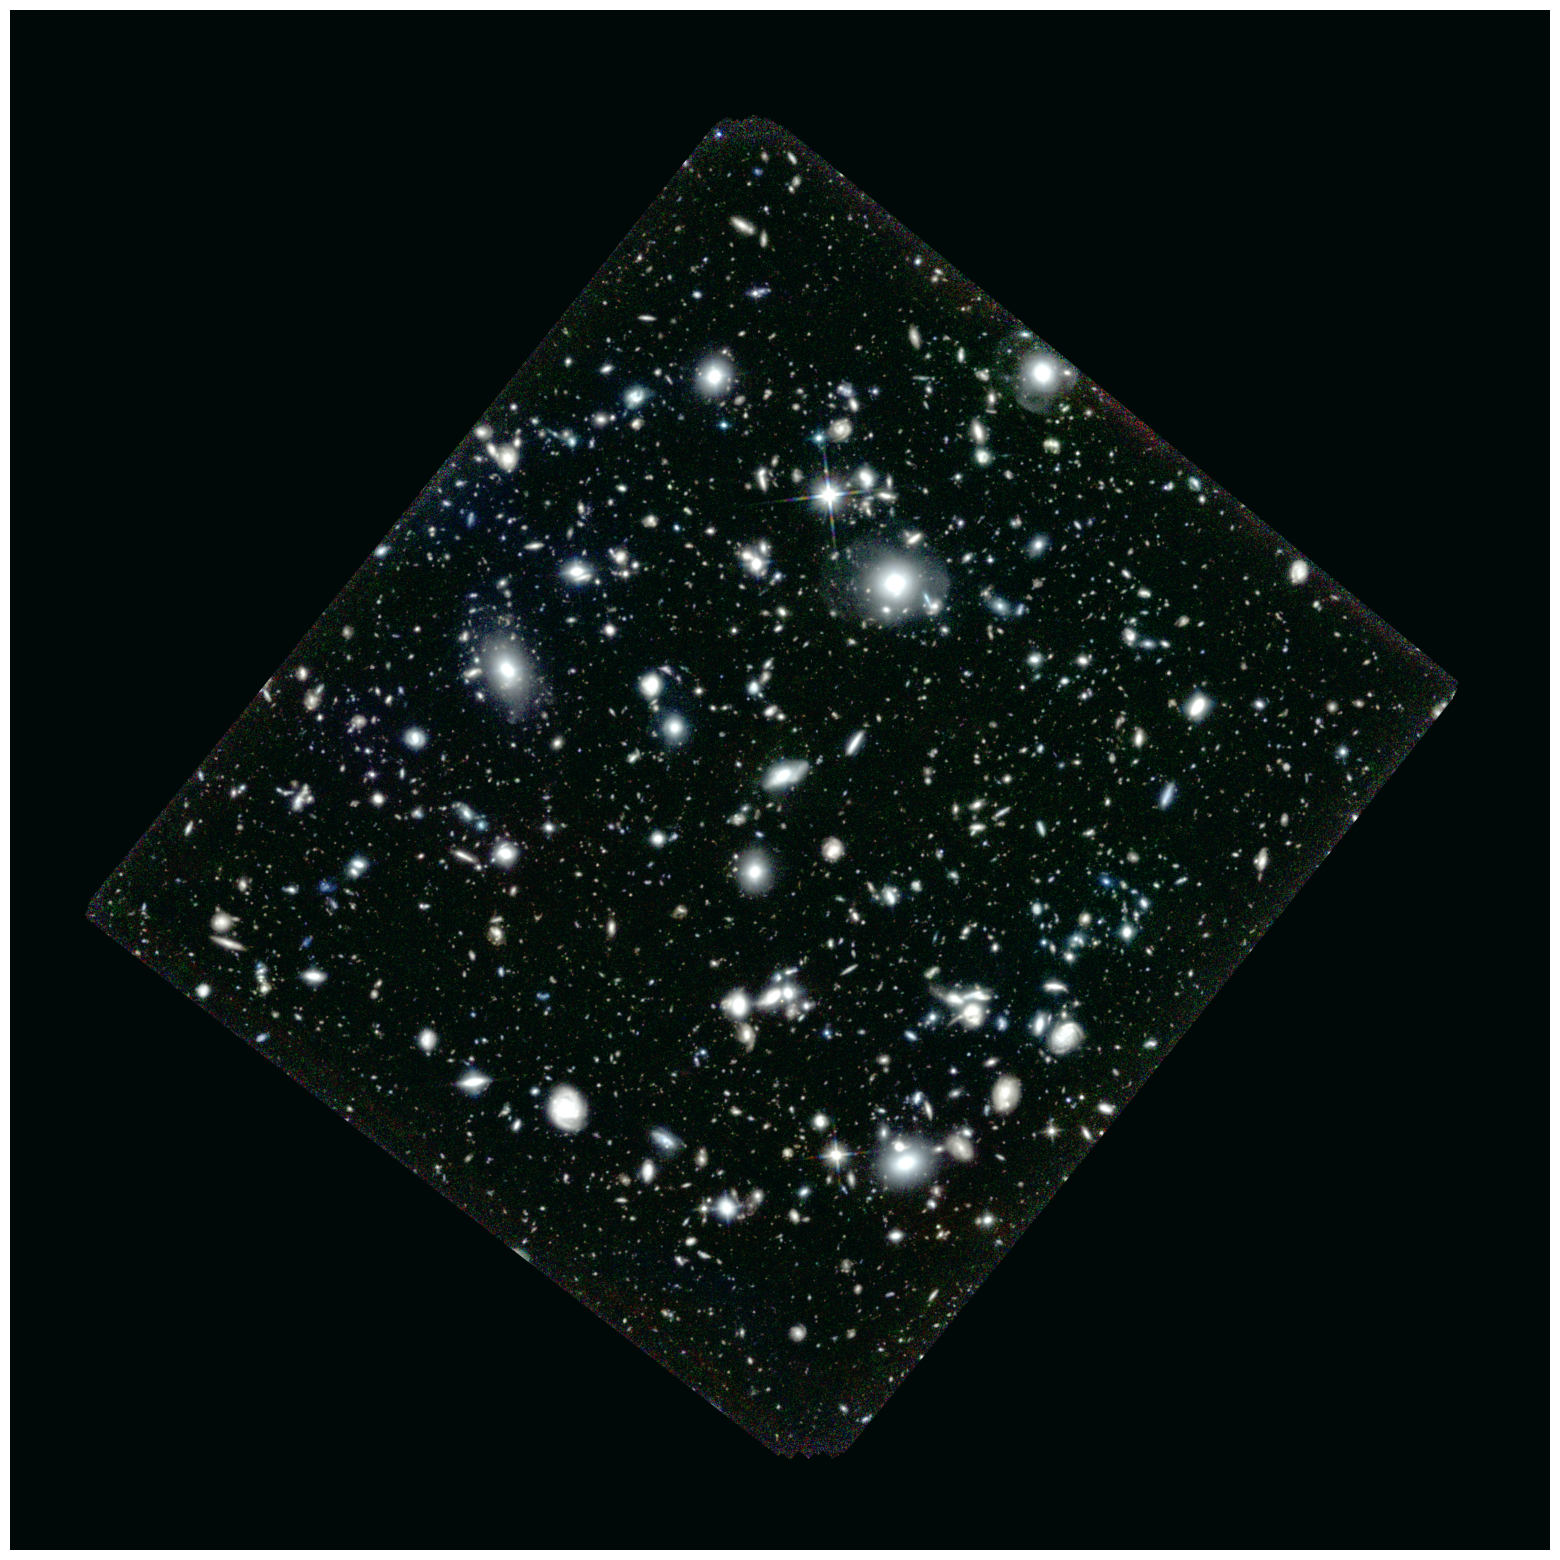

In [322]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('finalproject1_6.png',bbox_inches='tight',pad_inches=0)